<a href="https://colab.research.google.com/github/razon1494/ML-Practices/blob/main/Copy_of_Module_23_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Module 23: K-Means Clustering
## Implementing K-Means on a Dataset
## Model Evaluation, Limitations & Use Cases

---

### Why this notebook?
By the end of this notebook, you will be able to:
- Apply K-Means to real data
- Understand what each parameter does
- Visualize clusters clearly
- Evaluate clustering quality
- Know when **not** to use K-Means


## 🔹 Section 1: Import Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Explanation
- NumPy and Pandas for data handling
- Matplotlib and Seaborn for visualization
- KMeans from sklearn does the clustering
- StandardScaler is critical because K-Means uses distance
- Silhouette score helps us evaluate clustering quality

> If you skip scaling, K-Means will happily lie to you.


## 🔹 Section 2: Load and Understand the Dataset


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We will **pretend we do not know** the species labels and focus only on feature-based grouping.


## 🔹 Section 3: Select Features for Clustering


In [ ]:
X = df[["sepal_length", "sepal_width"]]
X.head()


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


We use only two features so clusters are easy to visualize and understand.


## 🔹 Section 4: Feature Scaling (Non-Negotiable)


In [ ]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

> K-Means measures distance.
> Distance cares about scale.
> Therefore, scaling is mandatory.


## 🔹 Section 5: Implementing K-Means


In [ ]:
#Selecting value of K
k = 3

In [ ]:
#Implementing K-Means
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    max_iter=300,
    random_state=42
)

In [ ]:
#Data points: 1,2,3,10,11,12
#k=2
#m1=1, m2=10

In [ ]:
#Fitting the model
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

## 🔹 Section 6: Getting Cluster Assignments


In [ ]:
#Getting Cluster Assignments
labels = kmeans.labels_
labels[:75]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
df["cluster"]=labels
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


> These cluster labels are not ground truth. They are just group numbers.


## 🔹 Section 7: Visualizing the Clusters


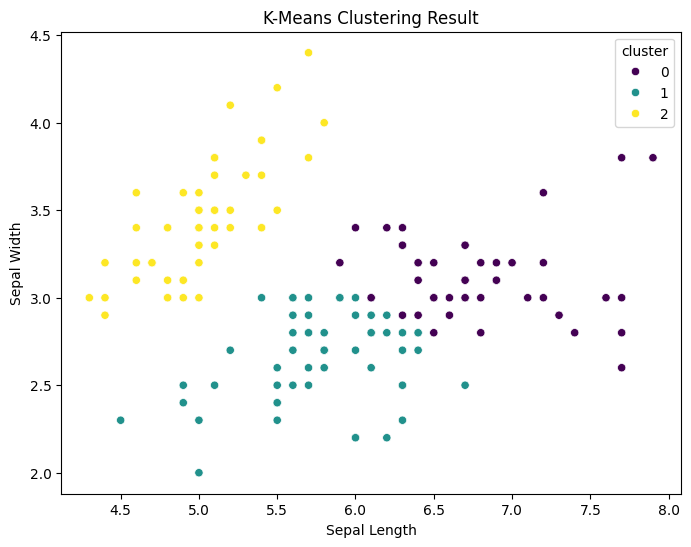

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["sepal_length"],
    y=df["sepal_width"],
    hue=df["cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

## 🔹 Section 8: Finding Optimal k (Elbow Method)


In [ ]:
#Finding Optimal k (Elbow Method)
inertia_values = []

k_range = range(1,11)

for k in k_range:
  km = KMeans(n_clusters=k, init="k-means++", random_state=42)
  km.fit(X_scaled)
  inertia_values.append(km.inertia_)

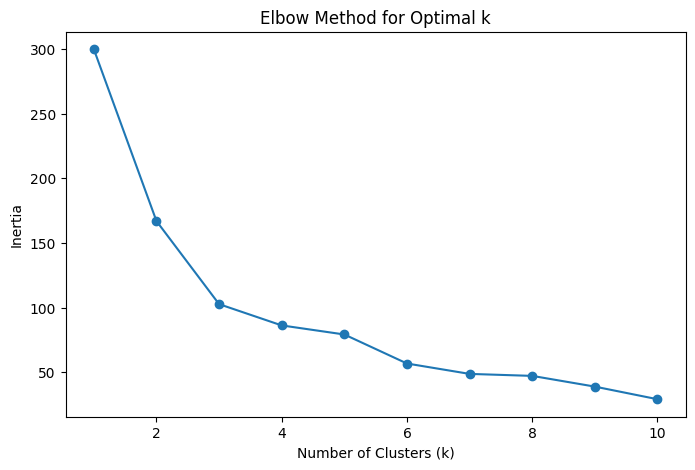

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

> The elbow is where improvement slows down.


## 🔹 Section 9: Model Evaluation (Silhouette Score)


In [ ]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.43585870333974647


Interpretation guide:
- Above 0.5 → strong clustering
- Around 0.2–0.4 → overlapping clusters
- Near 0 → useless clustering


## 🔹 Section 10: Limitations of K-Means


In [ ]:
limitations = [
    "Requires choosing k manually",
    "Sensitive to feature scaling",
    "Fails with non-spherical clusters",
    "Sensitive to outliers",
    "Distance-based, not density-based"
]

for l in limitations:
    print("-", l)


- Requires choosing k manually
- Sensitive to feature scaling
- Fails with non-spherical clusters
- Sensitive to outliers
- Distance-based, not density-based


## 🔹 Section 11: Real-World Use Cases

**Works well for:**
- Customer segmentation
- Image compression
- Market grouping
- Sensor data clustering

**Avoid using for:**
- Arbitrary-shaped clusters
- Highly skewed data
- Strong outliers


## 🔹 Section 12: Final Teaching Summary


In [ ]:
print("""
Key Takeaways:
- K-Means finds structure, not truth
- Scaling is mandatory
- k must be chosen carefully
- Always visualize results
- Never trust clusters blindly
""")


Key Takeaways:
- K-Means finds structure, not truth
- Scaling is mandatory
- k must be chosen carefully
- Always visualize results
- Never trust clusters blindly

